Name: Faiza Siddiqui

Student ID: 200473896

Subject: CS715 - Advanced Data Science and Machine Learning Final Exam - Part 1

## **LSTM (Long Short-Term Memory)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

In [ ]:
# Read HPI Aggregate data
df_hpi = pd.read_excel("./Seasonally Adjusted.xlsx", sheet_name="AGGREGATE")

# Select data from January 2005 to September 2022
df_hpi = df_hpi[(df_hpi["Date"] >= "2005-01-01") & (df_hpi["Date"] <= "2022-09-01")]

# Check for "NaN" values
print("Is NaN: ", df_hpi.isnull().values.any())

pd.concat([df_hpi.head(), df_hpi.tail()]).head(10)

Is NaN:  False


,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,Two_Storey_Benchmark_SA,Townhouse_Benchmark_SA,Apartment_Benchmark_SA
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,221200,234700,194200,273800,204300,171700
1,2005-02-01,100.6,100.6,100.4,100.7,100.3,101.1,222600,236200,195000,275600,205000,173600
2,2005-03-01,101.4,101.4,101.0,101.4,100.6,101.7,224300,237900,196200,277700,205500,174700
3,2005-04-01,102.2,102.3,101.8,102.2,100.8,102.3,226000,240000,197600,279800,206000,175600
4,2005-05-01,102.8,103.0,102.4,103.0,101.0,102.8,227500,241800,198800,282000,206300,176500
208,2022-05-01,370.3,386.0,360.0,383.6,363.5,337.2,819200,905900,699200,1050200,742600,579000
209,2022-06-01,363.3,377.9,350.4,376.2,358.0,333.8,803700,887000,680400,1030000,731400,573200
210,2022-07-01,356.8,370.0,343.3,368.6,353.6,331.7,789300,868500,666600,1009300,722400,569600
211,2022-08-01,350.8,363.4,336.8,362.4,346.9,328.4,775900,853000,654100,992300,708800,563900
212,2022-09-01,345.7,358.1,331.7,357.6,343.4,324.3,764700,840400,644100,979200,701500,556900


In [ ]:
# Read CPI data
df_cpi = pd.read_csv("./CPI_MONTHLY.csv", skiprows=25)

# Select data from January 2005 to September 2022
df_cpi = df_cpi[(df_cpi["date"] >= "2005-01-01") & (df_cpi["date"] <= "2022-09-01")]

# Check for "NaN" values
print("Is NaN: ", df_cpi.isnull().values.any())

pd.concat([df_cpi.head(), df_cpi.tail()]).head(10)

Is NaN:  False


,date,V41690973,V41690914,STATIC_TOTALCPICHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,ATOM_V41693242,STATIC_CPIXFET,CPIW
120,2005-01-01,105.3,105.8,1.9,1.7,1.8,2.0,1.7,1.1,1.6
121,2005-02-01,105.7,105.9,2.1,1.7,1.8,2.0,1.7,1.4,1.7
122,2005-03-01,106.3,106.2,2.3,1.9,2.0,2.0,1.8,1.5,1.9
123,2005-04-01,106.6,106.4,2.4,1.8,1.9,2.0,1.6,1.1,1.8
124,2005-05-01,106.7,106.3,1.6,1.8,1.8,1.9,1.6,1.2,1.6
328,2022-05-01,151.9,151.3,7.7,5.4,4.7,6.1,6.1,5.2,6.3
329,2022-06-01,152.9,152.1,8.1,5.5,4.8,6.3,6.2,5.3,6.4
330,2022-07-01,153.1,152.3,7.6,5.4,4.9,6.6,6.1,5.5,6.2
331,2022-08-01,152.6,152.4,7.0,5.2,4.7,6.3,5.8,5.3,6.0
332,2022-09-01,152.7,153.0,6.9,5.2,4.7,6.2,6.0,5.4,6.0


In [ ]:
# Read combined index data
df_tsx = pd.read_csv("./GSPTSE.csv")

# Select data from January 2005 to September 2022
df_tsx = df_tsx[(df_tsx["Date"] >= "2005-01-01") & (df_tsx["Date"] <= "2022-09-01")]

# Check for "NaN" values
print("Is NaN: ", df_tsx.isnull().values.any())

pd.concat([df_tsx.head(), df_tsx.tail()]).head(10)

Is NaN:  False


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-01,9190.099609,9246.799805,8952.799805,9204.099609,9204.099609,2.335455e+09
1,2005-02-01,9211.500000,9774.599609,9204.099609,9668.299805,9668.299805,2.446393e+09
2,2005-03-01,9701.200195,9968.400391,9390.500000,9612.400391,9612.400391,2.955366e+09
3,2005-04-01,9675.299805,9701.400391,9243.700195,9369.299805,9369.299805,2.377228e+09
4,2005-05-01,9349.099609,9679.900391,9261.500000,9607.299805,9607.299805,2.304422e+09
208,2022-05-01,20707.699219,21212.900391,19480.000000,20729.300781,20729.300781,6.123814e+09
209,2022-06-01,20816.699219,21036.400391,18661.500000,18861.400391,18861.400391,6.198477e+09
210,2022-07-01,18951.199219,19734.000000,18169.900391,19692.900391,19692.900391,4.716788e+09
211,2022-08-01,19568.900391,20323.599609,19329.900391,19330.800781,19330.800781,5.300429e+09
212,2022-09-01,19179.500000,20032.599609,18982.000000,19987.199219,19987.199219,1.697976e+09


In [ ]:
# Read Prime rate data
df_cpr = pd.read_excel("./Prime Rate History-WOWA.xlsx")

# Convert date from string to datetime
df_cpr["Date"] = pd.to_datetime(df_cpr["Date"], format="%B %Y")

# Select data from January 2005 to September 2022
df_cpr = df_cpr[(df_cpr["Date"] >= "2005-01-01") & (df_cpr["Date"] <= "2022-09-01")]

# Check for "NaN" values
print("Is NaN: ", df_cpr.isnull().values.any())

pd.concat([df_cpr.head(), df_cpr.tail()]).head(10)

Is NaN:  False


,Date,Prime Rate,Bank of Canada Overnight Rate
565,2005-01-01,4.25,2.50
566,2005-02-01,4.25,2.50
567,2005-03-01,4.25,2.50
568,2005-04-01,4.25,2.50
569,2005-05-01,4.25,2.50
773,2022-05-01,3.20,1.00
774,2022-06-01,3.70,1.50
775,2022-07-01,4.70,2.50
776,2022-08-01,4.70,2.50
777,2022-09-01,5.45,3.25


In [ ]:
# Select relevant columns from each dataset
hpi_prediction = "Composite_HPI_SA"
hpi_columns = ["Date", hpi_prediction]

hpi_columns = df_hpi.columns

cpi_columns = ["V41690973", "V41690914", "STATIC_TOTALCPICHANGE",
               "CPI_TRIM", "CPI_MEDIAN", "CPI_COMMON", "ATOM_V41693242",
               "STATIC_CPIXFET","CPIW"]

tsx_columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

cpr_columns = ["Prime Rate", "Bank of Canada Overnight Rate"]

# Merge selected columns into one dataset
df = pd.concat([
    df_hpi[hpi_columns].reset_index(drop=True),
    df_cpi[cpi_columns].reset_index(drop=True),
    df_tsx[tsx_columns].reset_index(drop=True),
    df_cpr[cpr_columns].reset_index(drop=True)],
    axis=1)

# Check for "NaN" values
print("Is NaN: ", df.isnull().values.any())

pd.concat([df.head(), df.tail()]).head(10)

Is NaN:  False


,Date,Composite_HPI_SA,Single_Family_HPI_SA,One_Storey_HPI_SA,Two_Storey_HPI_SA,Townhouse_HPI_SA,Apartment_HPI_SA,Composite_Benchmark_SA,Single_Family_Benchmark_SA,One_Storey_Benchmark_SA,...,STATIC_CPIXFET,CPIW,Open,High,Low,Close,Adj Close,Volume,Prime Rate,Bank of Canada Overnight Rate
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,221200,234700,194200,...,1.1,1.6,9190.099609,9246.799805,8952.799805,9204.099609,9204.099609,2.335455e+09,4.25,2.50
1,2005-02-01,100.6,100.6,100.4,100.7,100.3,101.1,222600,236200,195000,...,1.4,1.7,9211.500000,9774.599609,9204.099609,9668.299805,9668.299805,2.446393e+09,4.25,2.50
2,2005-03-01,101.4,101.4,101.0,101.4,100.6,101.7,224300,237900,196200,...,1.5,1.9,9701.200195,9968.400391,9390.500000,9612.400391,9612.400391,2.955366e+09,4.25,2.50
3,2005-04-01,102.2,102.3,101.8,102.2,100.8,102.3,226000,240000,197600,...,1.1,1.8,9675.299805,9701.400391,9243.700195,9369.299805,9369.299805,2.377228e+09,4.25,2.50
4,2005-05-01,102.8,103.0,102.4,103.0,101.0,102.8,227500,241800,198800,...,1.2,1.6,9349.099609,9679.900391,9261.500000,9607.299805,9607.299805,2.304422e+09,4.25,2.50
208,2022-05-01,370.3,386.0,360.0,383.6,363.5,337.2,819200,905900,699200,...,5.2,6.3,20707.699219,21212.900391,19480.000000,20729.300781,20729.300781,6.123814e+09,3.20,1.00
209,2022-06-01,363.3,377.9,350.4,376.2,358.0,333.8,803700,887000,680400,...,5.3,6.4,20816.699219,21036.400391,18661.500000,18861.400391,18861.400391,6.198477e+09,3.70,1.50
210,2022-07-01,356.8,370.0,343.3,368.6,353.6,331.7,789300,868500,666600,...,5.5,6.2,18951.199219,19734.000000,18169.900391,19692.900391,19692.900391,4.716788e+09,4.70,2.50
211,2022-08-01,350.8,363.4,336.8,362.4,346.9,328.4,775900,853000,654100,...,5.3,6.0,19568.900391,20323.599609,19329.900391,19330.800781,19330.800781,5.300429e+09,4.70,2.50
212,2022-09-01,345.7,358.1,331.7,357.6,343.4,324.3,764700,840400,644100,...,5.4,6.0,19179.500000,20032.599609,18982.000000,19987.199219,19987.199219,1.697976e+09,5.45,3.25


In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
# Split data into train and test
# Train = First 80% of data (2005-2018)
# Test = Last 20% of data (2019-2022)
TRAIN_FRACTION = 0.8

train_size = int(0.8 * len(df))

train_df = df[:train_size]
test_df = df[train_size:]

print("Train: ", len(train_df))
print("Test: ", len(test_df))

Train:  170
Test:  43


In [ ]:
# Normalize data
min_values = train_df.loc[:, train_df.columns != 'Date'].min()
max_values = train_df.loc[:, train_df.columns != 'Date'].max()

def normalize(df):
    df_norm = (df.loc[:, df.columns != 'Date'] - min_values) / (max_values - min_values)
    return df_norm

def denormalize_hpi(y_norm):
    y = y_norm * (max_values[hpi_prediction] - min_values[hpi_prediction]) + min_values[hpi_prediction]
    return y

train_df_norm = normalize(train_df)
test_df_norm = normalize(test_df)

In [ ]:
# Create sequences of all possible lengths for sequence modelling

TRAIN_WINDOW_SIZE_RANGE = np.arange(2, len(train_df)+1)
TEST_WINDOW_SIZE_RANGE = np.arange(2, len(test_df)+1)
MAXLEN = np.maximum(len(train_df), len(test_df))

def generate_sequences(df, window_size, maxlen):
    Xs, ys = [], []
    n_windows = len(df) - window_size + 1
    for i in range(n_windows):
        window = df[i: i + window_size].values
        X = tf.keras.utils.pad_sequences(
            window[:-1, :].transpose(),
            maxlen=maxlen,
            dtype='float32',
            padding='pre',
            truncating='pre',
            value=-1.0
        ).transpose()
        y = window[-1, 1]
        Xs.append(X)
        ys.append(y)
    Xs = np.array(Xs)
    ys = np.array(ys)

    return Xs, ys

def generate_consecutive_sequences(df):
    Xs, ys = [], []
    maxlen = len(df)
    window_size_range = np.arange(5, len(df)+1)
    for window_size in window_size_range:
        X, y = generate_sequences(df, window_size, MAXLEN)
        Xs.append(X[0])
        ys.append(y[0])

    Xs = np.array(Xs)
    ys = np.array(ys)

    return Xs, ys

def create_dataset(df, window_size_range, maxlen, shuffle=False):
    Xs, ys = [], []
    for window_size in window_size_range:
        X, y = generate_sequences(df, window_size, maxlen)
        Xs.extend(X)
        ys.extend(y)
   
    Xs = np.array(Xs)
    ys = np.array(ys)

    if shuffle:
        p = np.random.permutation(len(Xs))
        Xs = Xs[p]
        ys = ys[p]
    
    return Xs, ys

train_X, train_y = create_dataset(train_df_norm, TRAIN_WINDOW_SIZE_RANGE, MAXLEN, shuffle=True)
test_X, test_y = create_dataset(test_df_norm, TEST_WINDOW_SIZE_RANGE, MAXLEN)
test_X2, test_y2 = generate_consecutive_sequences(test_df_norm)
combined_X, combined_y = generate_consecutive_sequences(
    pd.concat([train_df_norm, test_df_norm], axis=0))

print(f"Train: ({train_X.shape}, {train_y.shape})")
print(f"Test: ({test_X.shape}, {test_y.shape})")
print(f"Test2: ({test_X2.shape}, {test_y2.shape})")
print(f"Combined: ({combined_X.shape}, {combined_y.shape})")

Train: ((14365, 170, 21), (14365,))
Test: ((903, 170, 21), (903,))
Test2: ((39, 170, 21), (39,))
Combined: ((209, 170, 21), (209,))


In [ ]:
# Define LSTM model
inputs = tf.keras.layers.Input(shape=(None, train_X.shape[-1]), name="input")

x = inputs

x = tf.keras.layers.Masking(mask_value=-1.0, input_shape=x.shape)(x)

x = tf.keras.layers.LSTM(units=512, return_sequences=True)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.LSTM(units=512, return_sequences=False)(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(units=1, activation=None)(x)

outputs = x

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 21)]        0         
                                                                 
 masking_17 (Masking)        (None, None, 21)          0         
                                                                 
 lstm_21 (LSTM)              (None, None, 512)         1093632   
                                                                 
 dropout_7 (Dropout)         (None, None, 512)         0         
                                                                 
 lstm_22 (LSTM)              (None, 512)               2099200   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 513

In [ ]:
epochs = 10
batch_size = 512

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_percentage_error',
    metrics=['mean_absolute_error']
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='loss', factor=0.1, patience=1, verbose=1,
        mode='auto', min_delta=0.5,
    )
]

H = model.fit(
    train_X, train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/10
29/29 [==============================] - 33s 897ms/step - loss: 42.7388 - mean_absolute_error: 0.2650 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 27s 926ms/step - loss: 7.7543 - mean_absolute_error: 0.0467 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 25s 877ms/step - loss: 6.0396 - mean_absolute_error: 0.0363 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 25s 875ms/step - loss: 5.2093 - mean_absolute_error: 0.0314 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 5.2297 - mean_absolute_error: 0.0317
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
29/29 [==============================] - 26s 882ms/step - loss: 5.2297 - mean_absolute_error: 0.0317 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 25s 877ms/step - loss: 4.6320 - mean_absolute_error: 0.0280 - lr: 1.0000e-04
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 4.4245

In [ ]:
test_y_pred = model.predict(test_X)
test_y_pred_actual = denormalize_hpi(test_y_pred)

test_y_actual = denormalize_hpi(test_y)

print("TEST - All possible sequences:-\nRMSE: {}\nMAE: {}\nMAPE: {}".format(
    tf.keras.metrics.RootMeanSquaredError()(test_y_actual, test_y_pred_actual),
    tf.keras.metrics.MeanAbsoluteError()(test_y_actual, test_y_pred_actual),
    tf.keras.metrics.MeanAbsolutePercentageError()(test_y_actual, test_y_pred_actual),
))

29/29 [==============================] - 4s 66ms/step
TEST - All possible sequences:-
RMSE: 43.77980422973633
MAE: 31.922752380371094
MAPE: 10.020013809204102


In [ ]:
test_y2_pred = model.predict(test_X2)
test_y2_pred_actual = denormalize_hpi(test_y2_pred)

test_y2_actual = denormalize_hpi(test_y2)

print("TEST - Linear sequences:-\nRMSE: {}\nMAE: {}\nMAPE: {}".format(
    tf.keras.metrics.RootMeanSquaredError()(test_y2_actual, test_y2_pred_actual),
    tf.keras.metrics.MeanAbsoluteError()(test_y2_actual, test_y2_pred_actual),
    tf.keras.metrics.MeanAbsolutePercentageError()(test_y2_actual, test_y2_pred_actual),
))

2/2 [==============================] - 0s 74ms/step
TEST - Linear sequences:-
RMSE: 21.716835021972656
MAE: 16.681678771972656
MAPE: 5.253709316253662


In [ ]:
combined_y_pred = model.predict(combined_X)
combined_y_pred_actual = denormalize_hpi(combined_y_pred)

combined_y_actual = denormalize_hpi(combined_y)

print("COMBINED - Linear sequences:-\nRMSE: {}\nMAE: {}\nMAPE: {}".format(
    tf.keras.metrics.RootMeanSquaredError()(combined_y_actual, combined_y_pred_actual),
    tf.keras.metrics.MeanAbsoluteError()(combined_y_actual, combined_y_pred_actual),
    tf.keras.metrics.MeanAbsolutePercentageError()(combined_y_actual, combined_y_pred_actual),
))

7/7 [==============================] - 0s 60ms/step
COMBINED - Linear sequences:-
RMSE: 9.387643814086914
MAE: 4.2461957931518555
MAPE: 1.648942232131958


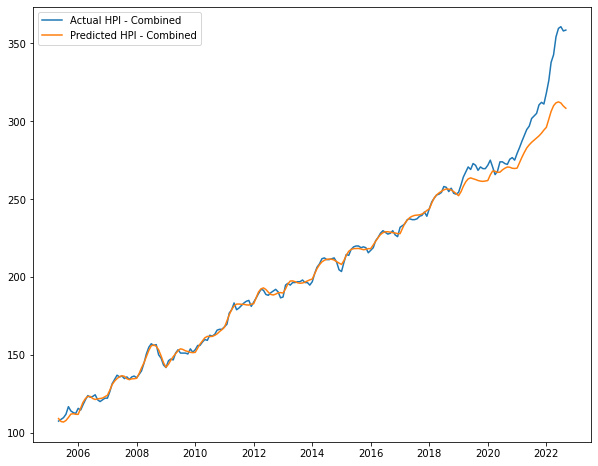

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(df['Date'][4:], combined_y_actual, label='Actual HPI - Combined')
plt.plot(df['Date'][4:], tf.squeeze(combined_y_pred_actual).numpy(), label='Predicted HPI - Combined')
plt.legend()
plt.savefig("img.jpg")
plt.show()

In conclusion, we have found in this study that it is possible to roughly estimate the changes in HPI values based on historical factors affecting the housing markets. However, it would not be amiss to explore more factors that can possibly effect house prices, and different models that can put this data to good use.